In [1]:
import os
os.chdir('..')

In [8]:
from pump_controller import PumpController, get_serial_port, list_serial_ports
from pump_controller import visualize_rgb, visualize_candidates
import time
import numpy as np

### Calibrations

In [149]:
calibratebot = PumpController(get_serial_port())

Serial port /dev/cu.usbserial-1440 opened at baud rate 9600
Arduino is ready


In [162]:
calibratebot.purge_pump('D', 2)

Sent from PC -- TEST STR -- <Mix,8,2>
Reply Received  Msg Mix,8,2 Time 220


In [118]:
times = [0.1, 0.2, 0.4, 0.8, 1.0, 1.6, 2.0, 2.5, 3.0, 5.0, 7.0, 8.0]

def calibration_test(pump, times):
    for t in times:
        calibratebot.purge_pump(pump, t)
        print(f"sleeping after {t} on {pump}")
        print("-----------")
        print()
        
        time.sleep(t + 5.0)

In [121]:
calibration_test('W', times)

Sent from PC -- TEST STR -- <Mix,6,0.1>
Reply Received  Msg Mix,6,0.1 Time 1763
sleeping after 0.1 on W
-----------

Sent from PC -- TEST STR -- <Mix,6,0.2>
Reply Received  Msg Mix,6,0.2 Time 1773
sleeping after 0.2 on W
-----------

Sent from PC -- TEST STR -- <Mix,6,0.4>
Reply Received  Msg Mix,6,0.4 Time 1783
sleeping after 0.4 on W
-----------

Sent from PC -- TEST STR -- <Mix,6,0.8>
Reply Received  Msg Mix,6,0.8 Time 1794
sleeping after 0.8 on W
-----------

Sent from PC -- TEST STR -- <Mix,6,1.0>
Reply Received  Msg Mix,6,1.0 Time 1805
sleeping after 1.0 on W
-----------

Sent from PC -- TEST STR -- <Mix,6,1.6>
Reply Received  Msg Mix,6,1.6 Time 1817
sleeping after 1.6 on W
-----------

Sent from PC -- TEST STR -- <Mix,6,2.0>
Reply Received  Msg Mix,6,2.0 Time 1830
sleeping after 2.0 on W
-----------

Sent from PC -- TEST STR -- <Mix,6,2.5>
Reply Received  Msg Mix,6,2.5 Time 1844
sleeping after 2.5 on W
-----------

Sent from PC -- TEST STR -- <Mix,6,3.0>
Reply Received  Msg Mix,

In [1]:
from setuptools import setup, find_packages

### RGB Sensor Accuracy

In [3]:
arduinobot = PumpController(get_serial_port(), cell_volume=20.0, drain_time=20.0)

Serial port /dev/cu.usbserial-1420 opened at baud rate 9600
Arduino is ready


In [19]:
mixtures = np.repeat(np.identity(4),4, axis = 0)

measurements = []

for color_mixture in mixtures:
    color_measurement = arduinobot.mix_color(color_mixture)

    measurements.append(color_measurement)

print(measurements)




Sent from PC -- TEST STR -- <Mix,2,8.107164982>
Reply Received  Msg Mix,2,8.107164982 Time 483
Sent from PC -- TEST STR -- <Meas>
Reply Received  Msg Meas Time 506
Sent from PC -- TEST STR -- <Mix,8,20.0>
Reply Received  Msg Mix,8,20.0 Time 511
Sent from PC -- TEST STR -- <Mix,7,7.819166095>
Reply Received  Msg Mix,7,7.819166095 Time 552
Sent from PC -- TEST STR -- <Mix,8,20.0>
Reply Received  Msg Mix,8,20.0 Time 570
Sent from PC -- TEST STR -- <Mix,2,8.107164982>
Reply Received  Msg Mix,2,8.107164982 Time 611
Sent from PC -- TEST STR -- <Meas>
Reply Received  Msg Meas Time 635
Sent from PC -- TEST STR -- <Mix,8,20.0>
Reply Received  Msg Mix,8,20.0 Time 640
Sent from PC -- TEST STR -- <Mix,7,7.819166095>
Reply Received  Msg Mix,7,7.819166095 Time 681
Sent from PC -- TEST STR -- <Mix,8,20.0>
Reply Received  Msg Mix,8,20.0 Time 698
Sent from PC -- TEST STR -- <Mix,2,8.107164982>
Reply Received  Msg Mix,2,8.107164982 Time 739
Sent from PC -- TEST STR -- <Meas>
Reply Received  Msg Meas Tim

In [40]:
color_measurements = np.divide(measurements, 255)

# Split the list into sets of four lists
sets_of_four_lists = [color_measurements[i:i+4] for i in range(0, len(color_measurements), 4)]

# Calculate average percentage deviation (coefficient of variation) for each color set
for i, color_set in enumerate(sets_of_four_lists):
    # Convert the color set to a NumPy array for calculations
    color_set_np = np.array(color_set)
    
    # Calculate mean and standard deviation for each color in the set
    mean_values = np.mean(color_set_np, axis=0)
    std_deviation = np.std(color_set_np, axis=0)
    
    # Calculate coefficient of variation (CV) as a percentage for each color dimension
    coefficient_of_variation = (std_deviation / mean_values) * 100
    
    # Calculate the average percentage deviation for each color set
    average_percentage_deviation = np.mean(coefficient_of_variation)
    
    print(f"Set {i+1} Average Percentage Deviation (R, G, B): {average_percentage_deviation}")

Set 1 Average Percentage Deviation (R, G, B): 2.6282191661216356
Set 2 Average Percentage Deviation (R, G, B): 6.32381993577935
Set 3 Average Percentage Deviation (R, G, B): 0.39825479711406514
Set 4 Average Percentage Deviation (R, G, B): 2.728210998685062


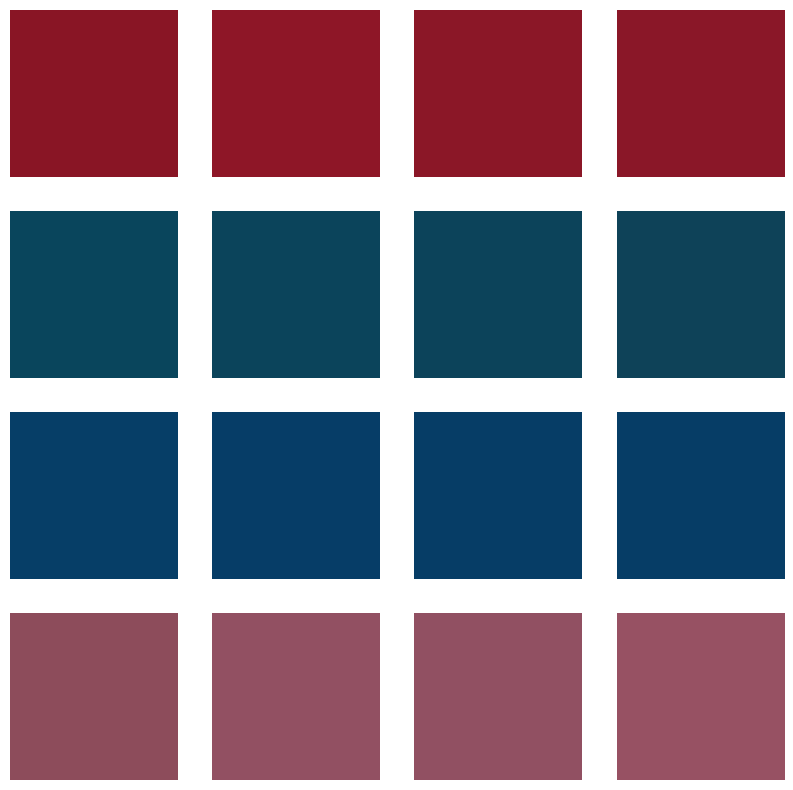

In [44]:
import matplotlib.pyplot as plt

# Convert the color measurements to NumPy array and normalize to [0, 1]
colors = np.array(color_measurements)

# Create a 4x4 subplot
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate through the colors and plot each one
for i, color in enumerate(colors):
    axs[i].imshow([[color]])
    axs[i].axis('off')

plt.show()